# Predicting heart disease using machine learning

this notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine-learning model capable of predicting whether or not someone has a heart disease based of medical attributes. We will also implement `Pipeline` and `Transformer` at the end of this notebook.

The approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition

Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

# 2. Data

The original data came from the Cleavland data from UCI Machine Learning repository. https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

# 3. Evaluation
The purpose of this notebook is to practice machine-learning, however, we will try to reach 90% accuracy on our model.

# 4. Features
This is where you will get different information about each of the features in your data.

**create data dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type:
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* Angina = a type of chest pain by reduced blood flow to heart
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 1: upsloping
    * Value 2: flat
    * Value 3: downsloping     
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
    * Value 0: < 50% diameter narrowing
    * Value 1: > 50% diameter narrowing

# Importing the tools

We are going to use Pandas, Numpy, and Matplotlib for data analysis and manipulation

In [1]:
# import the tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#model for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

loads data from github and show the shape

In [2]:
url = "https://raw.githubusercontent.com/bernandogunawan/machine_learning_practices/refs/heads/main/data/heart_disease/heart_disease_uci.csv"
df= pd.read_csv(url, index_col=0)
df= df.drop("dataset",axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Data Exploration (exploratory data analysis or EDA)

the goal here is to find out more about the data and become subject matter expert on the dataset you are working with.

1. what question(s) are you trying to solve
2. what kind of data we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them
5. how can you add, change or remove features to get out more of your data?

In [3]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 107.8+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
pd.crosstab(df.num,df.sex)

sex,Female,Male
num,,
0,144,267
1,30,235
2,10,99
3,8,99
4,2,26


In [7]:
df[:5].T

id,1,2,3,4,5
age,63,67,67,37,41
sex,Male,Male,Male,Male,Female
cp,typical angina,asymptomatic,asymptomatic,non-anginal,atypical angina
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
fbs,True,False,False,False,False
restecg,lv hypertrophy,lv hypertrophy,lv hypertrophy,normal,lv hypertrophy
thalch,150.0,108.0,129.0,187.0,172.0
exang,False,True,True,False,False
oldpeak,2.3,1.5,2.6,3.5,1.4


In [8]:
pd.crosstab(df["slope"],df["num"])

num,0,1,2,3,4
slope,,,,,
downsloping,14,15,14,13,7
flat,79,144,57,51,14
upsloping,125,39,19,17,3


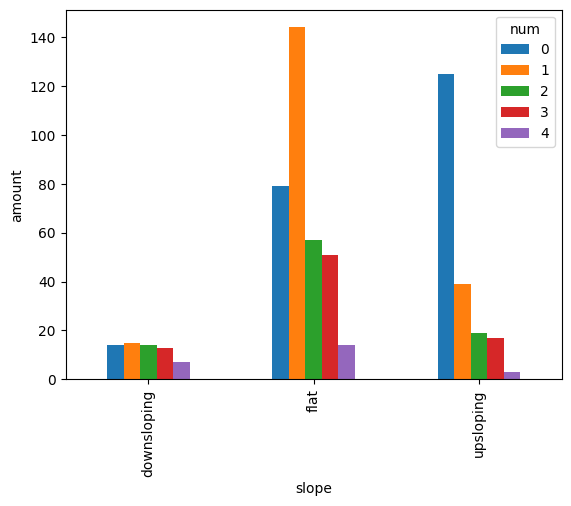

In [9]:
bar_plot = pd.crosstab(df["slope"],df["num"]).plot.bar(ylabel="amount")
bar_plot;

In [10]:
df["thal"].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


## **changing the value of Y to 0 or 1**

In [11]:
df_temp = df.copy()

In [12]:
replacement_list = list(df["num"])

In [13]:
df["num"].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [14]:
# change the value in "num" column to 0 and 1
for index in range(len(replacement_list)):
    if replacement_list[index]>1:
        replacement_list[index]=1

df_temp["num"]=replacement_list

In [15]:
df_temp["num"].value_counts()

,count
num,
1,509
0,411


*check if it's done correctly*

In [16]:
for i in range(len(df["num"])):
    if df["num"].loc[i+1] < df_temp["num"].loc[i+1]:
        print("False")
        break

In [17]:
df_temp.dtypes

,0
age,int64
sex,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64
exang,object
oldpeak,float64


## change object datatypes to categories

In [18]:
df_temp["fbs"].dtype

dtype('O')

In [19]:
for label,content in df_temp.items():
    if pd.api.types.is_object_dtype(content):
        #add another column to store if it is missing or not
        df_temp[label+"is_missing"] =  df_temp[label].isna()
        #change the dtype to categorical with + 1
        df_temp[label] = pd.Categorical(content,ordered=True).codes + 1

In [20]:
df_temp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,ca,thal,num,sexis_missing,cpis_missing,fbsis_missing,restecgis_missing,exangis_missing,slopeis_missing,thalis_missing
id,,,,,,,,,,,,,,,,,,,,,
1,63,2,4,145.0,233.0,2,1,150.0,1,2.3,...,0.0,1,0,False,False,False,False,False,False,False
2,67,2,1,160.0,286.0,1,1,108.0,2,1.5,...,3.0,2,1,False,False,False,False,False,False,False
3,67,2,1,120.0,229.0,1,1,129.0,2,2.6,...,2.0,3,1,False,False,False,False,False,False,False
4,37,2,3,130.0,250.0,1,2,187.0,1,3.5,...,0.0,2,0,False,False,False,False,False,False,False
5,41,1,2,130.0,204.0,1,1,172.0,1,1.4,...,0.0,2,0,False,False,False,False,False,False,False


## split the data

split data to train and test data
and also fill the missing numeric values

In [21]:
df_temp.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,0
restecg,0
thalch,55
exang,0
oldpeak,62


In [22]:
x_data = df_temp.drop("num",axis=1)
y_data = df_temp["num"]

In [23]:
x_train, x_test, y_train, y_test =  train_test_split(x_data, y_data,test_size= 0.2)

In [24]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape

((736, 20), (184, 20), (736,), (184,))

In [25]:
x_train.fillna(x_train.median(),inplace=True)

In [26]:
x_test.fillna(x_test.median(),inplace=True)

In [27]:
x_train.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


## Making a model

1. LogisticRegression
2. RandomForestClassifier
3. KNeighborClassifier
4. SVC (support Vector Machine)

In [28]:
model = {"lr" : LogisticRegression(),
         "rf" : RandomForestClassifier(),
         "knn" : KNeighborsClassifier(),
         "svm" : SVC()
}
result = {}

In [29]:
for label,clf in model.items():
    clf.fit(x_train,y_train)
    result[label+"_train"] = clf.score(x_train,y_train)
    result[label+"_test"] = clf.score(x_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
result

{'lr_train': 0.8206521739130435,
 'lr_test': 0.8206521739130435,
 'rf_train': 1.0,
 'rf_test': 0.8043478260869565,
 'knn_train': 0.7785326086956522,
 'knn_test': 0.7010869565217391,
 'svm_train': 0.7146739130434783,
 'svm_test': 0.6739130434782609}

## let´s test it with cross validation
here I am filling the missing values first before splitting the data

In [31]:
x_data_cross = x_data.fillna(x_data.median())
x_data_cross.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sexis_missing,cpis_missing,fbsis_missing,restecgis_missing,exangis_missing,slopeis_missing,thalis_missing
id,,,,,,,,,,,,,,,,,,,,
1,63,2,4,145.0,233.0,2,1,150.0,1,2.3,1,0.0,1,False,False,False,False,False,False,False
2,67,2,1,160.0,286.0,1,1,108.0,2,1.5,2,3.0,2,False,False,False,False,False,False,False
3,67,2,1,120.0,229.0,1,1,129.0,2,2.6,2,2.0,3,False,False,False,False,False,False,False
4,37,2,3,130.0,250.0,1,2,187.0,1,3.5,1,0.0,2,False,False,False,False,False,False,False
5,41,1,2,130.0,204.0,1,1,172.0,1,1.4,3,0.0,2,False,False,False,False,False,False,False


In [32]:
x_data_cross.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [33]:
result_cv = {}
for label,clf in model.items():
    cross_val= cross_val_score(estimator=clf,X=x_data_cross,y=y_data,cv=5)
    result_cv[label]= cross_val.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [34]:
result_cv

{'lr': np.float64(0.7521739130434782),
 'rf': np.float64(0.7532608695652174),
 'knn': np.float64(0.6532608695652173),
 'svm': np.float64(0.6793478260869565)}

## Create a custom cross validation splitter

In [35]:
from sklearn.model_selection import KFold

In [36]:
def cv_fill(data,n_split):
    '''
    return a data dictionary containing list of train and test data
    '''
    data_dict={}
    kf=KFold(n_splits=n_split,shuffle=True)
    for i,(train_in,test_in) in enumerate(kf.split(data)):
        # this give me index of the train and test data
        x_temp_train = data.iloc[train_in]
        x_temp_test = data.iloc[test_in]

        #filling the values
        x_temp_train = x_temp_train.fillna(x_temp_train.median())
        x_temp_test = x_temp_test.fillna(x_temp_test.median())

        #split the data
        x_train = x_temp_train.drop("num",axis=1)
        x_test = x_temp_test.drop("num",axis=1)
        y_train = x_temp_train["num"]
        y_test = x_temp_test["num"]

        #insert in dictionary
        data_dict["fold" + str(i)] = (x_train,x_test,y_train,y_test)
    return data_dict

In [37]:
cv = cv_fill(df_temp,5)

In [38]:
cv["fold0"][0].head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sexis_missing,cpis_missing,fbsis_missing,restecgis_missing,exangis_missing,slopeis_missing,thalis_missing
id,,,,,,,,,,,,,,,,,,,,
1,63,2,4,145.0,233.0,2,1,150.0,1,2.3,1,0.0,1,False,False,False,False,False,False,False
4,37,2,3,130.0,250.0,1,2,187.0,1,3.5,1,0.0,2,False,False,False,False,False,False,False
7,62,1,1,140.0,268.0,1,1,160.0,1,3.6,1,2.0,2,False,False,False,False,False,False,False
9,63,2,1,130.0,254.0,1,1,147.0,1,1.4,2,1.0,3,False,False,False,False,False,False,False
10,53,2,1,140.0,203.0,2,1,155.0,2,3.1,1,0.0,3,False,False,False,False,False,False,False


## Test our model with the new cross validation method
basically I split the data first before filling the missing values

In [39]:
model

{'lr': LogisticRegression(),
 'rf': RandomForestClassifier(),
 'knn': KNeighborsClassifier(),
 'svm': SVC()}

In [40]:
result_cv_2={}
for label,clf in model.items():
    result_list=[]
    for i in range(5):
        x_train = cv["fold"+str(i)][0]
        y_train = cv["fold"+str(i)][2]
        x_test = cv["fold"+str(i)][1]
        y_test = cv["fold"+str(i)][3]
        clf.fit(x_train,y_train)
        score= clf.score(x_test,y_test)
        result_list.append(score)
    result_cv_2[label]=sum(result_list)/len(result_list)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [41]:
result_cv_2

{'lr': 0.8097826086956521,
 'rf': 0.8119565217391305,
 'knn': 0.6967391304347827,
 'svm': 0.7108695652173913}

## Plotting the result before tuning hyperparameter

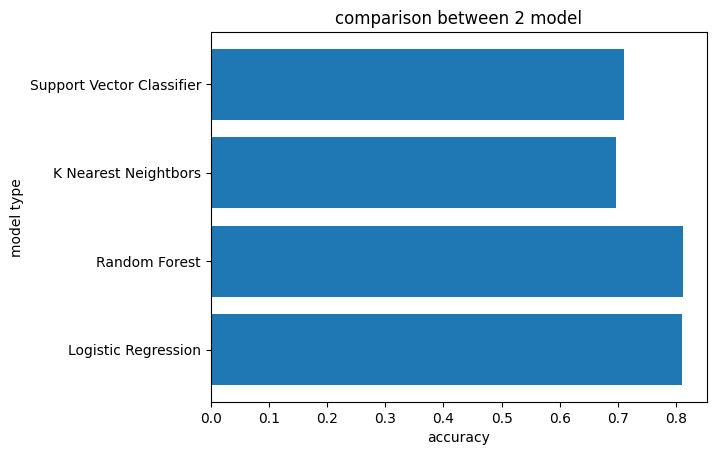

In [42]:
fi,ax = plt.subplots()
ax.barh(["Logistic Regression","Random Forest","K Nearest Neightbors","Support Vector Classifier"],result_cv_2.values())

ax.set(ylabel="model type",
      xlabel = "accuracy",
      title ="comparison between 2 model");

## Tuning the Parameter of our Model

tuning random forest with randomized cv

In [43]:
#tune random forest
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [44]:
x_train.shape

(736, 20)

In [45]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=10,
                         verbose=True)

rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [46]:
rs_rf.score(x_test,y_test)

0.8043478260869565

In [47]:
rs_rf.best_params_

{'n_estimators': np.int64(610),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(1),
 'max_depth': 5}

In [48]:
clf_rf = RandomForestClassifier(n_estimators=610,
                               min_samples_split=18,
                               min_samples_leaf=1,
                               max_depth=5)
clf_rf.fit(x_train,y_train)
clf_rf.score(x_test,y_test)

0.8043478260869565

In [49]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7880434782608695

## GridsearchCV

In [50]:
rf_grid = {"n_estimators": np.arange(510,710,50),
          "max_depth": [3,5,7],
          "min_samples_split": np.arange(17,19,1),
          "min_samples_leaf": np.arange(4,6,1)}

In [51]:
np.random.seed(42)
gs_rf = GridSearchCV(RandomForestClassifier(),rf_grid,cv=5,verbose=True,n_jobs=-1)
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': array([4, 5]),
                         'min_samples_split': array([17, 18]),
                         'n_estimators': array([510, 560, 610, 660])},
             verbose=True)

In [52]:
gs_rf.score(x_test,y_test)

0.8043478260869565

In [53]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': np.int64(4),
 'min_samples_split': np.int64(18),
 'n_estimators': np.int64(610)}

In [54]:
np.random.seed(42)
gs_clf = RandomForestClassifier(n_estimators=560,
                               min_samples_split=18,
                               min_samples_leaf=4,
                               max_depth=5)

gs_clf.fit(x_train,y_train)
gs_clf.score(x_test,y_test)

0.8043478260869565

## Evaluation off our model

we will use:
* ROC curve and AUC score
* confusion matrix
* classification report
* precision
* recall
* f1-score

In [55]:
# make prediction with tuned model
y_preds= gs_clf.predict(x_test)

# compare it with y_test

In [56]:
from sklearn.metrics import roc_curve

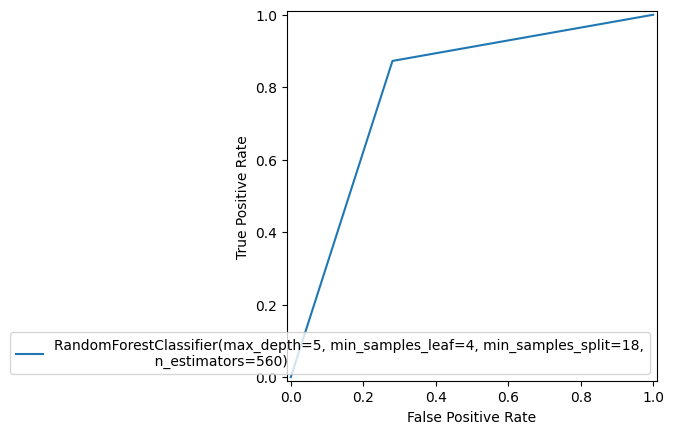

In [57]:
# Roc curve
fpr, tpr,threshold = roc_curve(y_test,y_preds)
RocCurveDisplay(estimator_name=gs_clf,fpr=fpr,tpr=tpr).plot()
plt.show()

In [58]:
print(confusion_matrix(y_test,y_preds))

[[59 23]
 [13 89]]


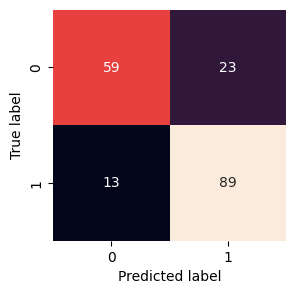

In [59]:
def plot_conf_mat(y_test,y_preds):
    fig,ax =plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_preds)

let's get classification report and cross-validated precision,recall, and f1-score

In [60]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        82
           1       0.79      0.87      0.83       102

    accuracy                           0.80       184
   macro avg       0.81      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



### calculate evaluation metrics using cross-validation
calculate precision, recall and f1-score of our models with cross-val-score

In [61]:
#cv accuracy
cv_acc = cross_val_score(gs_clf,x_data_cross,y_data,cv=5,scoring="accuracy")
cv_acc

array([0.77717391, 0.69565217, 0.90217391, 0.8423913 , 0.67391304])

In [62]:
np.mean(cv_acc)

np.float64(0.7782608695652173)

In [63]:
#cv_precision
cv_pre = cross_val_score(gs_clf,x_data_cross,y_data,cv=5,scoring="precision")
cv_pre

array([0.86046512, 0.76404494, 0.95698925, 0.8245614 , 0.6462585 ])

In [64]:
np.mean(cv_pre)

np.float64(0.810463842864251)

In [65]:
#cv_recall
cv_rec = cross_val_score(gs_clf,x_data_cross,y_data,cv=5,scoring="recall")
cv_rec

array([0.72277228, 0.66666667, 0.87254902, 0.92156863, 0.92156863])

In [66]:
np.mean(cv_rec)

np.float64(0.8210250436808387)

In [67]:
#cv_f1
cv_f1 = cross_val_score(gs_clf,x_data_cross,y_data,cv=5,scoring="f1")
cv_f1

array([0.77173913, 0.70833333, 0.90721649, 0.87037037, 0.75502008])

In [68]:
np.mean(cv_f1)

np.float64(0.8025358818610264)

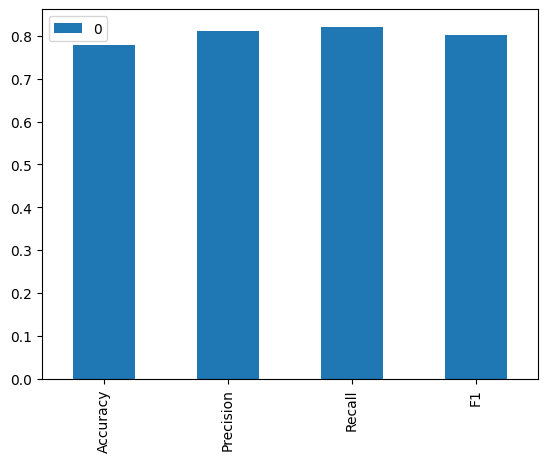

In [69]:
# Visualize cross-validated metrics

cv_metrics = pd.DataFrame({"Accuracy": np.mean(cv_acc),
                           "Precision":np.mean(cv_pre),
                           "Recall":np.mean(cv_rec),
                           "F1":np.mean(cv_f1)
                          },
                         index=[0])
cv_metrics.T.plot.bar();

## Feature Importance

it's another way of asking which features contributed most to the ouutcomes of the model

In [70]:
importance = gs_clf.feature_importances_

In [71]:
print(importance.reshape(1,20))

[[0.05483337 0.05243604 0.23994061 0.01971874 0.09628533 0.01690538
  0.00667651 0.13082308 0.14376689 0.09883924 0.03797519 0.02338518
  0.03888849 0.         0.         0.00849481 0.         0.00539878
  0.01833444 0.00729791]]


In [72]:
x_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'sexis_missing',
       'cpis_missing', 'fbsis_missing', 'restecgis_missing', 'exangis_missing',
       'slopeis_missing', 'thalis_missing'],
      dtype='object')

In [73]:
df_importance = pd.DataFrame(data = importance,index= x_data.columns,columns=["importance"])
df_importance.sort_values(by=["importance"],axis=0,ascending=False,inplace=True)
df_importance

,importance
cp,0.239941
exang,0.143767
thalch,0.130823
oldpeak,0.098839
chol,0.096285
age,0.054833
sex,0.052436
thal,0.038888
slope,0.037975
ca,0.023385


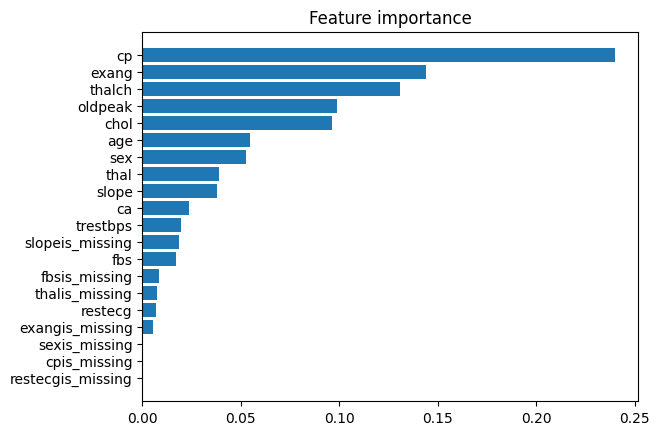

In [74]:
fig,ax = plt.subplots()
ax.barh(y=df_importance.index,width=df_importance["importance"])
ax.set(title="Feature importance")
ax.invert_yaxis();

# Remaking the notebook using `Pipeline` and `Transformer`

First we check the data again

In [119]:
df_temp = df.copy()
df_temp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [120]:
df_temp.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [121]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 140.1+ KB


In [122]:
replacement = []
# change the value in "num" column to 0 and 1
for i in df_temp["num"]:
    if i>=1:
      replacement.append(1)
    else:
      replacement.append(0)

df_temp["num"]=replacement

In [123]:
df_temp["num"].value_counts()

,count
num,
1,509
0,411


## Preprocessing the data

In [124]:
x_data = df_temp.drop("num",axis=1)
y_data = df_temp["num"]
x_data.shape, y_data.shape

((920, 13), (920,))

In [125]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 132.9+ KB


In [126]:
df_temp.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [127]:
categorical_features = ["sex","cp","restecg","slope","thal"]
numerical_features_mean = ["trestbps","chol","thalch","oldpeak"]
numerical_features_median = ["age", "ca","fbs","exang","trestbps","chol","thalch","oldpeak"]

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Creating pipelines for features

In [129]:
categorical_pipeline = Pipeline(steps=[
    ("cat",SimpleImputer(strategy = "constant",fill_value = "missing")),
    ("one_hot", OneHotEncoder(handle_unknown = "ignore"))
])

num_median_pipeline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="median"))
])
num_mean_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "mean"))
])

combining the pipeline to a transformer

In [130]:
preprocessing = ColumnTransformer([
    ("cat",categorical_pipeline,categorical_features),
    ("num_med", num_median_pipeline, numerical_features_median),
    ("num_mean", num_mean_pipeline, numerical_features_mean)
])

Creating final pipeline with a random forest model

In [131]:
model_pipeline = Pipeline(steps=[
    ("preprocess",preprocessing),
    ("model",RandomForestClassifier())
])

## now, we need to split the data to train and test set

In [132]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((736, 13), (736,), (184, 13), (184,))

In [133]:
model_pipeline.fit(x_train,y_train)
score = model_pipeline.score(x_test,y_test)
score

0.8369565217391305

let's use pipeline to do GridsearchCV as well

In [138]:
pipeline_grid = {
    "model__n_estimators" : np.arange(560,660,50),
    "model__max_depth" : [3,5,7],
    "model__min_samples_split" : [17,18,19],
    "model__min_samples_leaf" : [4,5,6]
}

model_rf = GridSearchCV(model_pipeline, pipeline_grid,cv=5, verbose = 2,scoring="accuracy",n_jobs=-1)
model_rf.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('cat',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'restecg',
                                                                          'slope',
                                                                          'thal']),
                                                                        ('num_med',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['age',...
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak']),
                                                                        ('num_mean',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['trestbps',
                                                                          'chol',
                                                                          'thalch',
                                                                          'oldpeak'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [3, 5, 7],
                         'model__min_samples_leaf': [4, 5, 6],
                         'model__min_samples_split': [17, 18, 19],
                         'model__n_estimators': array([560, 610])},
             scoring='accuracy', verbose=2)

In [139]:
model_rf.best_params_

{'model__max_depth': 5,
 'model__min_samples_leaf': 6,
 'model__min_samples_split': 18,
 'model__n_estimators': np.int64(560)}

In [140]:
score = model_rf.score(x_test,y_test)

In [141]:
score

0.8260869565217391